<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [3]:
from scipy.misc import imread
import PIL
import os
from PIL import Image
import numpy as np
from IPython.display import display, Math, Latex, Image
import matplotlib.pyplot as plt
%matplotlib inline

from model.img2seq import Img2SeqModel
from model.utils.general import Config, run
from model.utils.text import Vocab
from model.utils.image import greyscale, crop_image, pad_image, downsample_image, TIMEOUT
import model.components.attention_mechanism

In [4]:
# restore config and model
dir_output = "./results/full/"
config_vocab = Config(dir_output + "vocab.json")
config_model = Config(dir_output + "model.json")
vocab = Vocab(config_vocab)
model.components.attention_mechanism.ctx_vector = []
img2SeqModel = Img2SeqModel(config_model, dir_output, vocab)
img2SeqModel.build_pred()
# img2SeqModel.restore_session(dir_output + "model_weights/model.cpkt")

FileNotFoundError: [Errno 2] No such file or directory: './results/full/vocab.json'

In [ ]:
def readImg(img_path):
    if img_path[-3:] == "png":
        img = imread(img_path)

    elif img_path[-3:] == "pdf":
        # call magick to convert the pdf into a png file
        buckets = [
        [240, 100], [320, 80], [400, 80], [400, 100], [480, 80], [480, 100],
        [560, 80], [560, 100], [640, 80], [640, 100], [720, 80], [720, 100],
        [720, 120], [720, 200], [800, 100], [800, 320], [1000, 200],
        [1000, 400], [1200, 200], [1600, 200], [1600, 1600]
        ]

        dir_output = "tmp/"
        name = img_path.split('/')[-1].split('.')[0]
        run("magick convert -density {} -quality {} {} {}".format(200, 100, img_path, dir_output+"{}.png".format(name)), TIMEOUT)
        img_path = dir_output + "{}.png".format(name)
        crop_image(img_path, img_path)
        pad_image(img_path, img_path, buckets=buckets)
        downsample_image(img_path, img_path, 2)

        img = imread(img_path)
    return img

In [ ]:
img_path = "data/images_test/0.png"
img = readImg(img_path)
print(type(img), img.shape)
img = greyscale(img)
print(type(img), img.shape)

hyps = img2SeqModel.predict(img)

In [ ]:
# 1、显示图片
import matplotlib.pyplot as plt #plt 用于显示图片
import matplotlib.image as mpimg #mpimg 用于读取图片

lena = mpimg.imread(img_path) #读取目录下的图片
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
# print(lena.shape)

print("the image to predict:")
plt.figure(num=1, figsize=(8,5),)
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

print("predict LatTeX:\n")
print(hyps[0])

print("\n\nrender LatTeX:")
displayPreds = lambda LaTeX: display(Math(LaTeX))
displayPreds(hyps[0])

In [7]:
print(len(model.components.attention_mechanism.ctx_vector))

48


In [8]:
len(hyps[0].split(" "))

47

In [14]:
attentionVector = model.components.attention_mechanism.ctx_vector[-1]
att = sorted(list(enumerate(attentionVector[0].flatten())),key=lambda tup:tup[1],reverse=True)
idxs,att = zip(*att)
j=1
while sum(att[:j])<0.9:
    j+=1
positions = idxs[:j]
print(positions)
print("Attention weights: ",att[:j])

(64, 63, 30, 24, 27, 32, 25, 95, 96, 31, 29, 62, 55, 97, 65, 98, 6, 93, 54, 69, 58, 57, 18, 85, 91, 82, 84)
Attention weights:  (0.1904561, 0.10216277, 0.10134463, 0.07614658, 0.07094339, 0.038535256, 0.036463838, 0.029841008, 0.029266104, 0.023798723, 0.022133887, 0.020347353, 0.020001085, 0.018455146, 0.018046502, 0.014349735, 0.013038323, 0.012035104, 0.009469746, 0.009181045, 0.008439194, 0.007407488, 0.0071987226, 0.0068834303, 0.006534636, 0.006301264, 0.005370869)


In [13]:
attentionVector[0]

array([9.3959075e-01, 2.0876327e-03, 3.2866478e-03, 2.4950641e-04,
       3.0967468e-04, 2.3808115e-04, 6.1698418e-05, 2.6550841e-05,
       5.1027200e-05, 3.3716758e-04, 2.0829633e-04, 2.7439621e-05,
       1.5274204e-04, 3.0233712e-05, 3.1925857e-04, 3.7960289e-04,
       1.0786975e-03, 2.1520576e-04, 1.8019842e-03, 1.4730977e-03,
       7.8232127e-04, 3.1625730e-04, 1.3336356e-04, 9.9885836e-04,
       3.2250967e-04, 1.2331855e-04, 8.1130587e-05, 4.8978406e-04,
       2.8864069e-05, 2.8253253e-05, 9.5078949e-04, 2.7533164e-04,
       5.6721200e-04, 3.1077291e-03, 2.4645852e-03, 1.4845381e-04,
       4.8341864e-04, 1.2559067e-04, 2.4762601e-05, 1.1672025e-04,
       5.2983945e-05, 6.3636908e-05, 1.8117811e-05, 2.2001148e-04,
       9.6235868e-05, 8.6369160e-05, 3.3533779e-05, 6.7354430e-04,
       3.2971663e-04, 2.6712942e-04, 1.4470983e-04, 5.0995243e-04,
       1.8884750e-02, 1.7526154e-05, 6.2041938e-05, 8.9454296e-04,
       1.8156393e-04, 1.9371520e-04, 1.9613365e-04, 6.7375695e

In [15]:
l_size = 280
r_size = 40
l = int(np.ceil(r_size/8.))
r = int(np.ceil(l_size/8.))
print(l_size, r_size, l, r)

280 40 5 35


In [16]:
positions_norm = [(pos/r,pos%r) for pos in positions]
outarray = np.ones((l,r))*255.
for loc in positions_norm:
    outarray[int(loc[0]), int(loc[1])] = 0.
out_image = Image.fromarray(outarray).resize((l_size,r_size),Image.NEAREST)

In [ ]:
for pos in positions:
    print("({}, {})".format(int(pos/r), int(pos%r)))

In [ ]:
positions_norm

In [17]:
inp_image =Image.open(img_path)
# inp_image = Image.fromarray(lena).resize((l_size,r_size))
outp = Image.blend(inp_image.convert('RGBA'),out_image.convert('RGBA'),0.5)

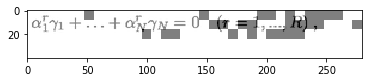

In [18]:
plt.imshow(np.asarray(outp))

In [50]:
def showAttention(img_path, attentionVector, l_size = 280, r_size = 40):
    att = sorted(list(enumerate(attentionVector.flatten())),key=lambda tup:tup[1],reverse=True)
    idxs,att = zip(*att)
    j=1
    while sum(att[:j])<0.9:
        j+=1
    positions = idxs[:j]
#     print(positions)
    print("Attention weights: ",att[:j])
    
    l = int(np.ceil(r_size/8.))
    r = int(np.ceil(l_size/8.))
    
    positions_norm = [(pos/r,pos%r) for pos in positions]
    outarray = np.ones((l+1,r+1))*255.
    for loc in positions_norm:
        print("({}, {})".format(int(loc[0]), int(loc[1])))
        outarray[int(loc[0]), int(loc[1])] = 0.
    out_image = Image.fromarray(outarray).resize((l_size,r_size),Image.NEAREST)
    
    inp_image =Image.open(img_path)
    # inp_image = Image.fromarray(lena).resize((l_size,r_size))
    outp = Image.blend(inp_image.convert('RGBA'),out_image.convert('RGBA'),0.5)
    
    plt.imshow(np.asarray(outp))
    

Attention weights:  (0.9542683,)
(0, 0)
Attention weights:  (0.9556623,)
(2, 29)
Attention weights:  (0.59270257, 0.30523354, 0.14749217)
(3, 27)
(3, 28)
(2, 0)
Attention weights:  (0.6875174, 0.47137567)
(3, 27)
(0, 34)
Attention weights:  (0.39590013, 0.27393937, 0.20011967, 0.16476971)
(1, 32)
(0, 34)
(3, 31)
(1, 1)
Attention weights:  (0.6169688, 0.44949105)
(0, 1)
(4, 25)
Attention weights:  (0.19881532, 0.17254636, 0.16342728, 0.123204194, 0.1083448, 0.101837404, 0.09724661)
(4, 27)
(1, 2)
(3, 29)
(3, 30)
(2, 32)
(2, 0)
(1, 34)
Attention weights:  (0.97157985,)
(0, 1)
Attention weights:  (0.5153511, 0.51193136)
(0, 1)
(2, 30)
Attention weights:  (0.71340376, 0.67807186)
(0, 2)
(2, 31)
Attention weights:  (0.15593028, 0.14656407, 0.10824284, 0.106773645, 0.09002662, 0.08925522, 0.08607354, 0.081916444, 0.078671664)
(3, 30)
(2, 31)
(0, 2)
(4, 27)
(1, 1)
(1, 33)
(0, 4)
(2, 33)
(1, 2)
Attention weights:  (0.20952146, 0.20745529, 0.15318432, 0.12783961, 0.11596619, 0.11585516)
(4, 29)

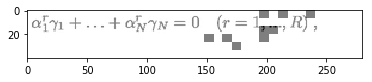

In [51]:
for attentionVector in model.components.attention_mechanism.ctx_vector:
    showAttention(img_path, attentionVector)

In [ ]:
for attentionVector in model.components.attention_mechanism.ctx_vector:
    att = sorted(list(enumerate(attentionVector.flatten())),key=lambda tup:tup[1],reverse=True)
    idxs,att = zip(*att)
    j=1
    while sum(att[:j])<0.9:
        j+=1
    positions = idxs[:]
#     print(positions)
#     print("Attention weights: ",att[:j])
    
    l = int(np.ceil(r_size/9.))
    r = int(np.ceil(l_size/9.))
    
    positions_norm = [(pos/r,pos%r) for pos in positions]
    outarray = np.ones((l+1,r+1))*255.
    for loc in positions_norm:
#         print("({}, {})".format(int(loc[0]), int(loc[1])))
        outarray[int(loc[0]), int(loc[1])] = 0.
    out_image = Image.fromarray(outarray).resize((l_size,r_size),Image.NEAREST)
    
    inp_image =Image.open(img_path)
    # inp_image = Image.fromarray(lena).resize((l_size,r_size))
    outp = Image.blend(inp_image.convert('RGBA'),out_image.convert('RGBA'),0.5)
    plt.figure()
    plt.imshow(np.asarray(outp))

In [28]:
att = sorted(list(enumerate(attentionVector[0].flatten())),key=lambda tup:tup[1],reverse=True)
idxs,positions = zip(*att)
for pos in positions:
    print(pos)

0.1904561
0.10216277
0.10134463
0.07614658
0.07094339
0.038535256
0.036463838
0.029841008
0.029266104
0.023798723
0.022133887
0.020347353
0.020001085
0.018455146
0.018046502
0.014349735
0.013038323
0.012035104
0.009469746
0.009181045
0.008439194
0.007407488
0.0071987226
0.0068834303
0.006534636
0.006301264
0.005370869
0.00448472
0.0040550823
0.0037010903
0.0034157336
0.0034008175
0.0032099907
0.0031377373
0.0030673617
0.0029633844
0.0029448778
0.0029134043
0.002880624
0.002691741
0.0024817379
0.0024379182
0.0024256245
0.0023824114
0.002214257
0.0022054517
0.0019202054
0.0018418594
0.0018108621
0.001705693
0.0016904012
0.0016144449
0.0015506773
0.0014531148
0.0013868271
0.0013221565
0.0013106957
0.0011251258
0.0010843007
0.0009909987
0.000990105
0.0009824617
0.0009716512
0.00093699875
0.00093399483
0.0008747801
0.0008604561
0.000688703
0.00062854344
0.00061591103
0.00060357957
0.0005844328
0.00057850656
0.0005318662
0.000524141
0.0005091581
0.0005022304
0.00047900638
0.00044969225
0.000

In [1]:
att = sorted(list(enumerate(attentionVector[0].flatten())),key=lambda tup:tup[1],reverse=True)
idxs,att = zip(*att)
j=1
while sum(att[:j])<0.9:
    j+=1
positions = idxs[:]
#     print(positions)
#     print("Attention weights: ",att[:j])

l = int(np.ceil(r_size/8.))
r = int(np.ceil(l_size/8.))

positions_norm = [(pos/r,pos%r) for pos in positions]
outarray = np.ones((l,r))*255.
for loc in positions_norm:
#         print("({}, {})".format(int(loc[0]), int(loc[1])))
    outarray[int(loc[0]), int(loc[1])] = 0.
out_image = Image.fromarray(outarray).resize((l_size,r_size),Image.NEAREST)

inp_image =Image.open(img_path)
# inp_image = Image.fromarray(lena).resize((l_size,r_size))
outp = Image.blend(inp_image.convert('RGBA'),out_image.convert('RGBA'),0.5)
plt.figure()
plt.imshow(np.asarray(outp))

NameError: name 'attentionVector' is not defined

In [26]:
len(att)

99

In [27]:
att

(0.1904561,
 0.10216277,
 0.10134463,
 0.07614658,
 0.07094339,
 0.038535256,
 0.036463838,
 0.029841008,
 0.029266104,
 0.023798723,
 0.022133887,
 0.020347353,
 0.020001085,
 0.018455146,
 0.018046502,
 0.014349735,
 0.013038323,
 0.012035104,
 0.009469746,
 0.009181045,
 0.008439194,
 0.007407488,
 0.0071987226,
 0.0068834303,
 0.006534636,
 0.006301264,
 0.005370869,
 0.00448472,
 0.0040550823,
 0.0037010903,
 0.0034157336,
 0.0034008175,
 0.0032099907,
 0.0031377373,
 0.0030673617,
 0.0029633844,
 0.0029448778,
 0.0029134043,
 0.002880624,
 0.002691741,
 0.0024817379,
 0.0024379182,
 0.0024256245,
 0.0023824114,
 0.002214257,
 0.0022054517,
 0.0019202054,
 0.0018418594,
 0.0018108621,
 0.001705693,
 0.0016904012,
 0.0016144449,
 0.0015506773,
 0.0014531148,
 0.0013868271,
 0.0013221565,
 0.0013106957,
 0.0011251258,
 0.0010843007,
 0.0009909987,
 0.000990105,
 0.0009824617,
 0.0009716512,
 0.00093699875,
 0.00093399483,
 0.0008747801,
 0.0008604561,
 0.000688703,
 0.00062854344,
 

In [36]:
sorted(list(enumerate(attentionVector[0].flatten())),key=lambda tup:tup[1],reverse=True)

[(64, 0.1904561),
 (63, 0.10216277),
 (30, 0.10134463),
 (24, 0.07614658),
 (27, 0.07094339),
 (32, 0.038535256),
 (25, 0.036463838),
 (95, 0.029841008),
 (96, 0.029266104),
 (31, 0.023798723),
 (29, 0.022133887),
 (62, 0.020347353),
 (55, 0.020001085),
 (97, 0.018455146),
 (65, 0.018046502),
 (98, 0.014349735),
 (6, 0.013038323),
 (93, 0.012035104),
 (54, 0.009469746),
 (69, 0.009181045),
 (58, 0.008439194),
 (57, 0.007407488),
 (18, 0.0071987226),
 (85, 0.0068834303),
 (91, 0.006534636),
 (82, 0.006301264),
 (84, 0.005370869),
 (49, 0.00448472),
 (8, 0.0040550823),
 (0, 0.0037010903),
 (48, 0.0034157336),
 (70, 0.0034008175),
 (92, 0.0032099907),
 (89, 0.0031377373),
 (88, 0.0030673617),
 (59, 0.0029633844),
 (94, 0.0029448778),
 (23, 0.0029134043),
 (75, 0.002880624),
 (40, 0.002691741),
 (51, 0.0024817379),
 (90, 0.0024379182),
 (52, 0.0024256245),
 (36, 0.0023824114),
 (15, 0.002214257),
 (60, 0.0022054517),
 (81, 0.0019202054),
 (72, 0.0018418594),
 (44, 0.0018108621),
 (39, 0.00

In [2]:
import os
os.listdir(dir_output+"")

NameError: name 'dir_output' is not defined

In [1]:
os.listdir("./results/")

NameError: name 'os' is not defined

In [9]:
os.getcwd()

'/mnt/c/Users/dlink/Documents/GitHub/img2latex/im2latex'